In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
hr=pd.read_csv('hr.csv')
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


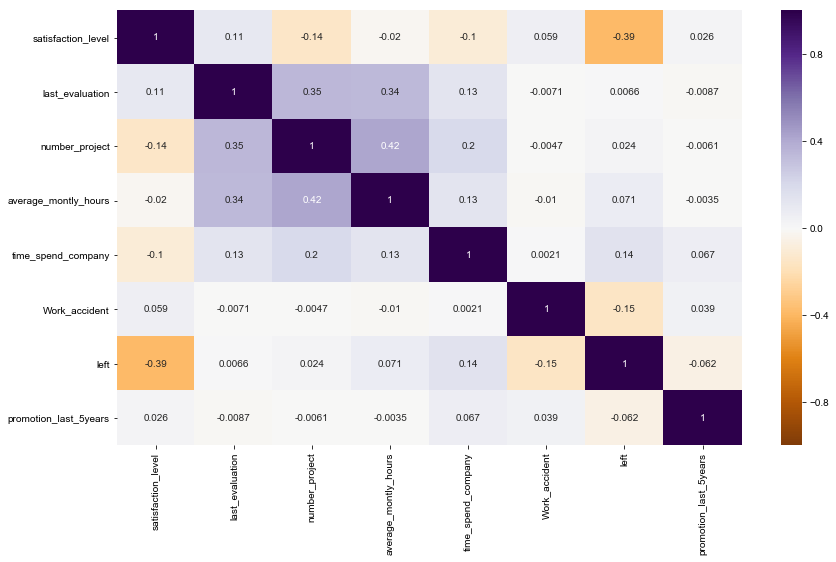

In [4]:
hr_corr=hr.corr()
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(hr_corr, annot=True, cmap="PuOr", center=0, vmin=-1, vmax=1,
            xticklabels=hr_corr.columns.values,
            yticklabels=hr_corr.columns.values)
sns.set(font='sans-serif')

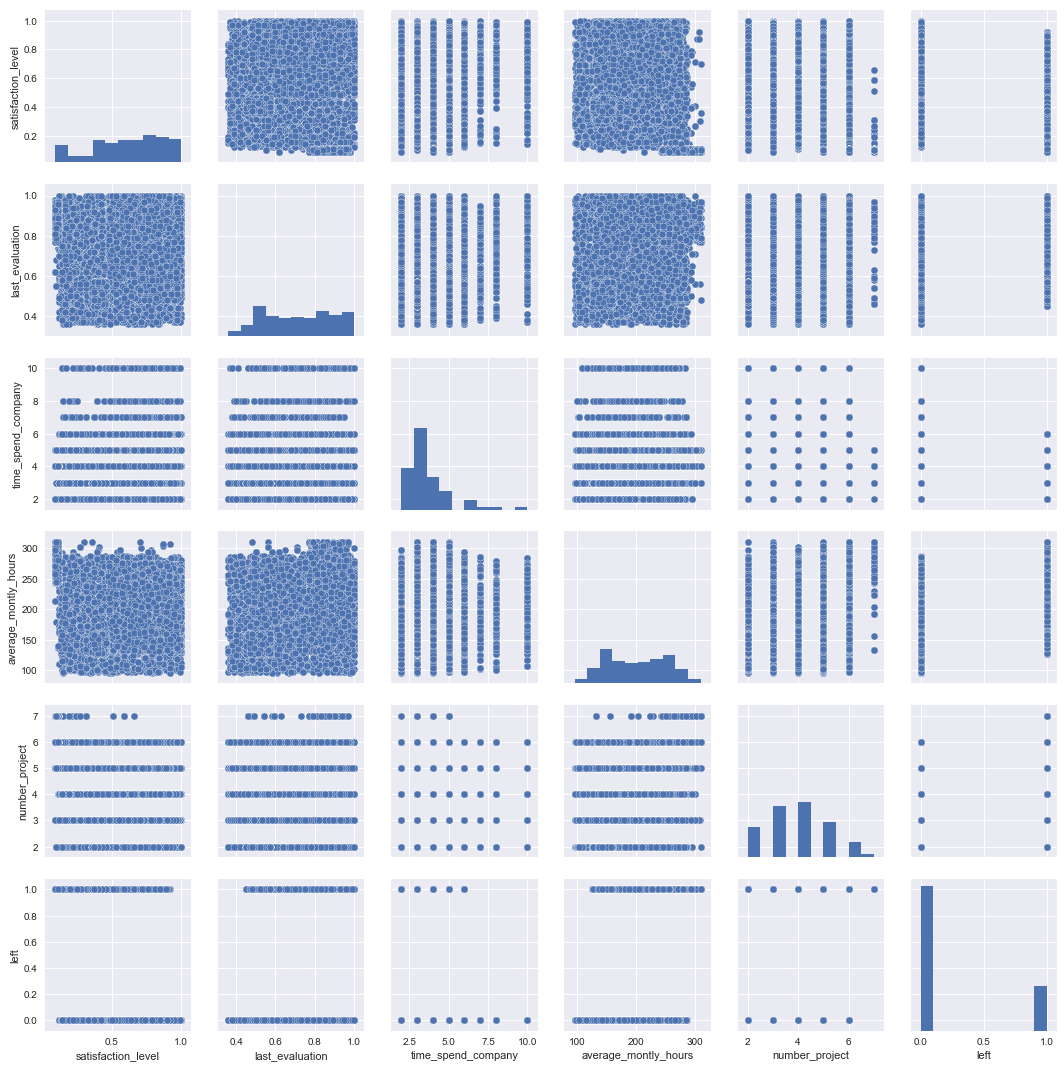

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.pairplot(hr, vars=['satisfaction_level','last_evaluation', 'time_spend_company', 
                       'average_montly_hours',  'number_project', 'left'], kind="scatter")

In [6]:
from scipy import stats

*Проверим гипотезу: количество проекты в отделе product menegment и accounting взаимосвязаны*

In [7]:
stats.ttest_ind(hr[hr['sales'] == 'product_mng']['number_project'], hr[hr['sales'] == 'accounting']['number_project'])

Ttest_indResult(statistic=-0.29593253884861087, pvalue=0.7673184601368009)

*Как видим, не взаимосвязаны*

**Рассчитать сколько работников работает в каждом департаменте**

In [8]:
hr.sales.value_counts().sort_values()

management      630
hr              739
accounting      767
RandD           787
marketing       858
product_mng     902
IT             1227
support        2229
technical      2720
sales          4140
Name: sales, dtype: int64

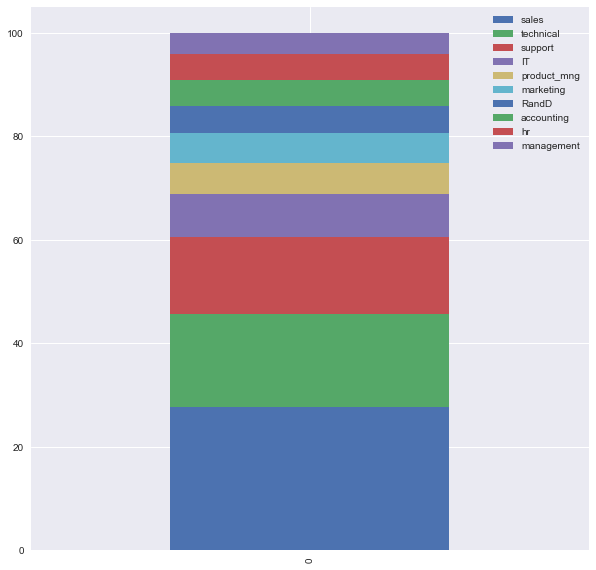

In [9]:
a= {}
for col in hr.columns:
    if max(hr[col].value_counts(normalize=True) * 100) > 5 and \
    max(hr[col].value_counts(normalize=True)    * 100) < 99.9:
        a[col] = max(hr[col].value_counts(normalize=True) * 100)
        
a = sorted(a.items(), key=lambda x: (-x[1], x[0]))

dict = {col: (hr[col].value_counts(normalize=True) * 100).head(10).to_dict() \
        for col in hr.columns if (max((hr[col].value_counts(normalize=True) * 100).head(10))> 5) \
        and max((hr[col].value_counts(normalize=True) * 100).head(10) < 99.9)}

pd.DataFrame.from_dict(dict['sales'], orient='index').T.plot.bar(stacked=True)

**Распределение сотрудников по зарплатам**

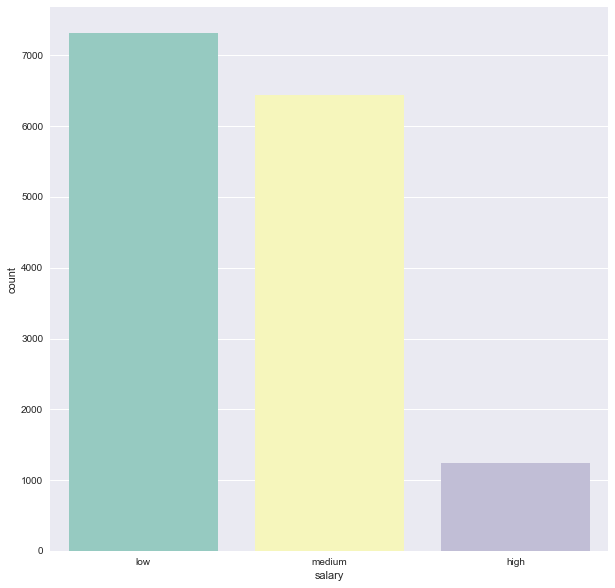

In [10]:
sns.countplot(hr['salary'])
sns.countplot(hr['salary'], palette="Set3")

**Показать распределение сотрудников по зарплатам совместно с департаментами**

In [11]:
hr.groupby(['sales', 'salary']).count()[['satisfaction_level']]

satisfaction_level
sales       salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

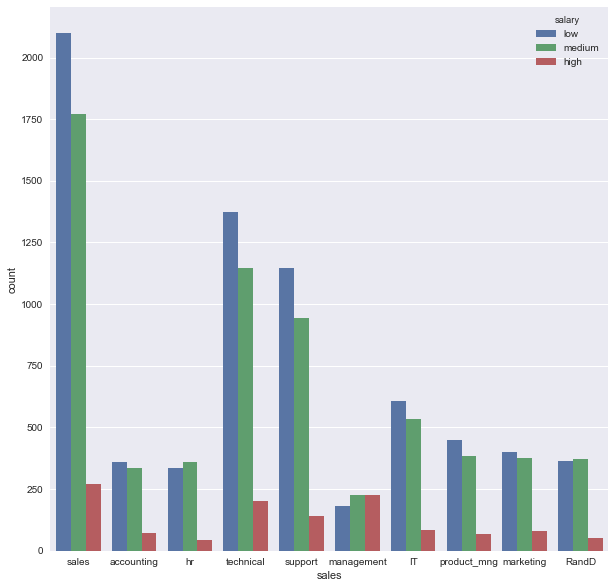

In [12]:
sns.countplot(x='sales', hue='salary', data=hr)

**Количество сотрудников, покинувших компанию**

In [13]:
hr[hr['left'] == 1]['left'].sum()

3571

**Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию**

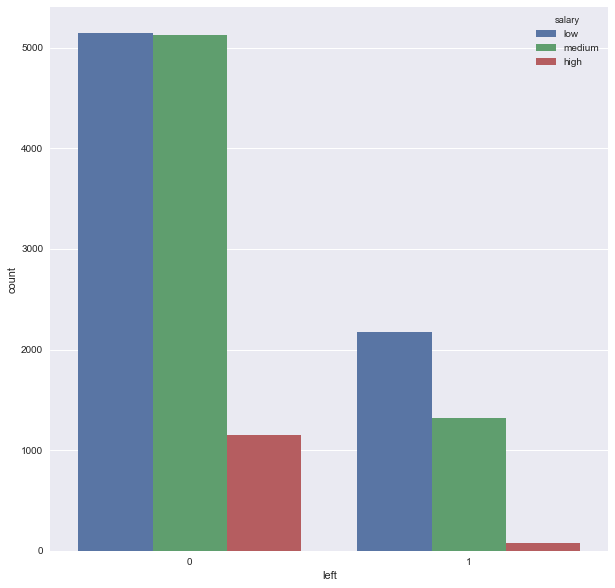

In [14]:
sns.countplot(x="left", hue="salary", data=hr)

Низкая зарплата - одна из причин увольнения сотрудников.

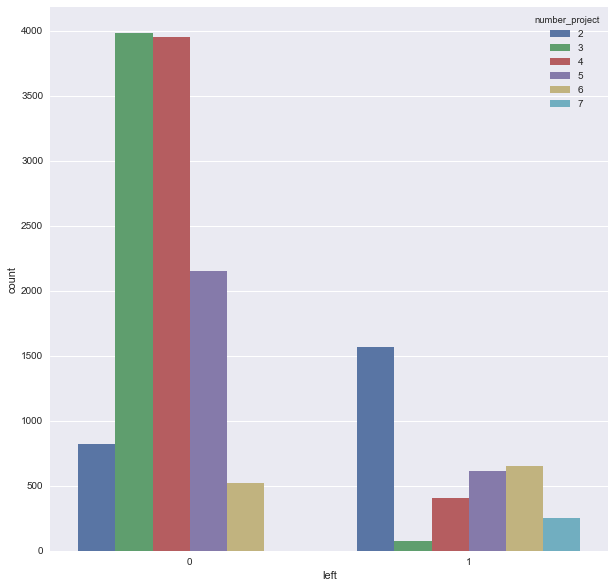

In [15]:
sns.countplot(x="left", hue="number_project", data=hr)

Половина уволившихся сотрудников вела много проектов, что также стало причиной ухода.

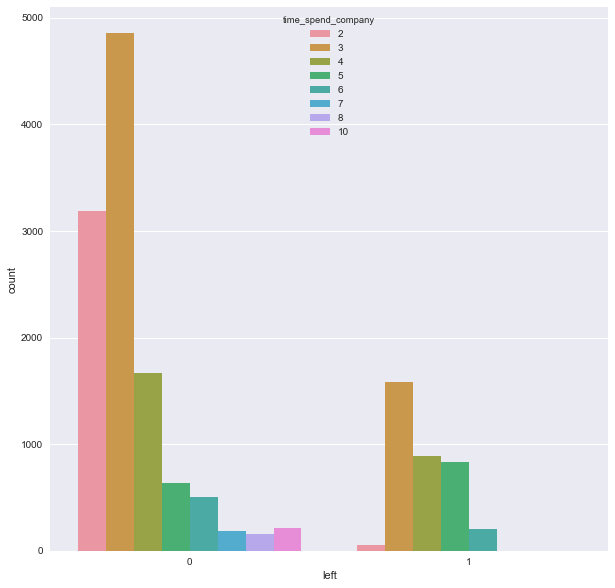

In [16]:
sns.countplot(x="left", hue="time_spend_company", data=hr)

Из графика видно, что первый год работы новых сотрудников устраивал, но на второй год многим захотелось покинуть компанию.
